# Trabajo Tutorial Básico


Recreación figura 8(a) [paper](https://iopscience.iop.org/article/10.3847/1538-4357/abbb34/pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/table4.csv')
df.head()

,QSO,zabs,Ncld,vcld,N-MgII,e_NMgII,bMgII,e_b-MgII,N-FeII,e_N-FeII,...,b-MgI,e_b-MgI,N-MnII,e_N-MnII,b-MnII,e_b-MnII,N-CaII,e_N-CaII,b-CaII,e_b-CaII
0,J000149-015939,0.870821,1,-93.01,13.10,0.035,5.76,0.185,13.32,0.023,...,5.76,0.185,11.19,-1.0,0.0,0.0,11.14,-1.0,0.0,0.0
1,J000149-015939,0.870821,2,-52.58,12.59,0.241,7.99,2.502,12.53,0.237,...,7.99,2.502,11.27,-1.0,0.0,0.0,11.25,-1.0,0.0,0.0
2,J000149-015939,0.870821,3,-46.49,13.03,0.190,3.18,0.435,12.93,0.096,...,3.18,0.435,11.08,-1.0,0.0,0.0,11.09,-1.0,0.0,0.0
3,J000149-015939,0.870821,4,-32.94,12.45,0.244,5.81,1.691,12.41,0.090,...,0.00,0.000,11.19,-1.0,0.0,0.0,11.21,-1.0,0.0,0.0
4,J000149-015939,0.870821,5,-23.87,12.51,0.373,17.61,9.999,11.47,-1.000,...,0.00,0.000,11.43,-1.0,0.0,0.0,11.41,-1.0,0.0,0.0


In [3]:
zs = pd.read_csv('Data/table1.csv')
zs.head()

,QSO,zem
0,J000149-015939,2.817
1,J000323-260318,4.111
2,J000344-232355,2.280
3,J000448-415728,2.760
4,J000520+052411,1.900


In [4]:
log_N_MgII = df['N-MgII']

err_log_N_MgII = df['e_NMgII']

In [5]:
bins = np.linspace(log_N_MgII.min(), log_N_MgII.max(), 14)
hist, bin_edges = np.histogram(log_N_MgII, bins=bins)

In [6]:
bins_centers = bin_edges + np.abs((bin_edges[0]-bin_edges[1])/2)
print(bins_centers)
print(bin_edges)
print(np.abs((bin_edges[0]-bin_edges[1])))

[10.79576923 11.30730769 11.81884615 12.33038462 12.84192308 13.35346154
 13.865      14.37653846 14.88807692 15.39961538 15.91115385 16.42269231
 16.93423077 17.44576923]
[10.54       11.05153846 11.56307692 12.07461538 12.58615385 13.09769231
 13.60923077 14.12076923 14.63230769 15.14384615 15.65538462 16.16692308
 16.67846154 17.19      ]
0.5115384615384624


In [7]:
df['bin'] = pd.cut(df['N-MgII'], bins = bins, labels = False)

In [37]:
bin_err = df.groupby('bin')['e_NMgII'].apply(lambda x: np.sqrt(np.sum(x**2))*13/2989)

In [38]:
df.head()

,QSO,zabs,Ncld,vcld,N-MgII,e_NMgII,bMgII,e_b-MgII,N-FeII,e_N-FeII,...,e_b-MgI,N-MnII,e_N-MnII,b-MnII,e_b-MnII,N-CaII,e_N-CaII,b-CaII,e_b-CaII,bin
0,J000149-015939,0.870821,1,-93.01,13.10,0.035,5.76,0.185,13.32,0.023,...,0.185,11.19,-1.0,0.0,0.0,11.14,-1.0,0.0,0.0,5.0
1,J000149-015939,0.870821,2,-52.58,12.59,0.241,7.99,2.502,12.53,0.237,...,2.502,11.27,-1.0,0.0,0.0,11.25,-1.0,0.0,0.0,4.0
2,J000149-015939,0.870821,3,-46.49,13.03,0.190,3.18,0.435,12.93,0.096,...,0.435,11.08,-1.0,0.0,0.0,11.09,-1.0,0.0,0.0,4.0
3,J000149-015939,0.870821,4,-32.94,12.45,0.244,5.81,1.691,12.41,0.090,...,0.000,11.19,-1.0,0.0,0.0,11.21,-1.0,0.0,0.0,3.0
4,J000149-015939,0.870821,5,-23.87,12.51,0.373,17.61,9.999,11.47,-1.000,...,0.000,11.43,-1.0,0.0,0.0,11.41,-1.0,0.0,0.0,3.0


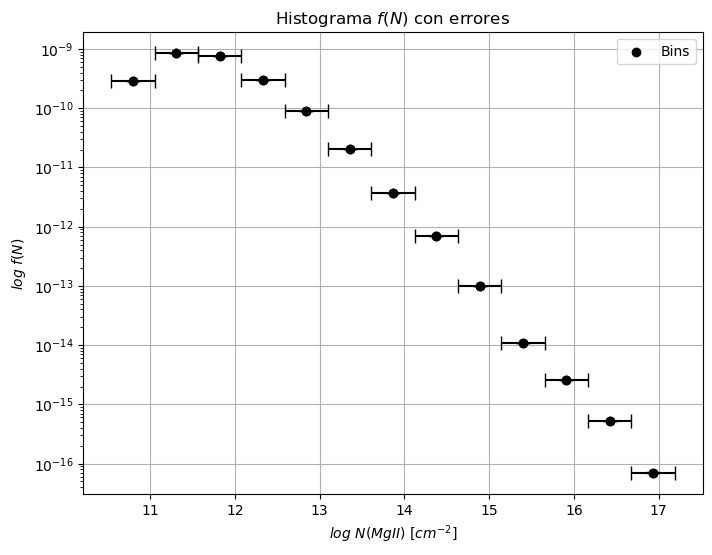

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(bins_centers[:-1], hist / 10**bins_centers[:-1], label='Bins', color='black')
plt.errorbar(bins_centers[:-1], hist / 10**bins_centers[:-1], xerr=(bin_edges[1:] - bin_edges[:-1]) / 2
             yerr=bin_err/ 10**bins_centers[:-1] , fmt='o', color='black', capsize=5)

# Configurar ejes y escala logarítmica
plt.yscale('log')
plt.ylabel(r'$log \ f(N)$')
plt.xlabel(r'$log \ N(MgII) \ [cm^{-2}]$')
plt.title('Histograma $f(N)$ con errores')
plt.legend()
plt.grid()
plt.show()

Pendiente (m): -1.0000 ± 0.0189
Intersección (b): 2.0000 ± 0.2673


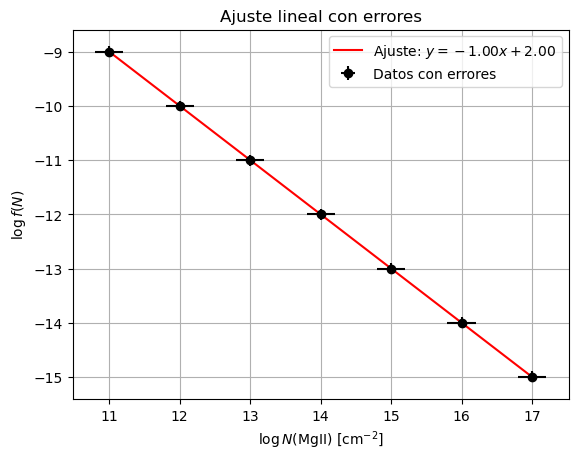

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos simulados (reemplaza con los datos reales)
x = np.array([11, 12, 13, 14, 15, 16, 17])  # log N(MgII) [cm^-2]
y = np.array([-9, -10, -11, -12, -13, -14, -15])  # log f(N)
x_err = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])  # Errores en x
y_err = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])  # Errores en y

# Función lineal para el ajuste
def linear_model(x, m, b):
    return m * x + b

# Ajuste lineal con errores
popt, pcov = curve_fit(linear_model, x, y, sigma=y_err, absolute_sigma=True)
m, b = popt  # m = pendiente, b = intersección
m_err, b_err = np.sqrt(np.diag(pcov))  # Errores en m y b

print(f"Pendiente (m): {m:.4f} ± {m_err:.4f}")
print(f"Intersección (b): {b:.4f} ± {b_err:.4f}")

# Graficar el ajuste
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', label='Datos con errores', color='black')
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_model(x_fit, m, b)
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {m:.2f}x + {b:.2f}$', color='red')

# Configuración del gráfico
plt.xlabel(r'$\log N(\mathrm{MgII})\ [\mathrm{cm}^{-2}]$')
plt.ylabel(r'$\log f(N)$')
plt.title('Ajuste lineal con errores')
plt.legend()
plt.grid(True)
plt.show()


In [82]:
z_abs = df['zabs']

In [83]:
df['lambda_abs'] = (1+z_abs)*2796.3543

In [84]:
df.head()

,QSO,zabs,Ncld,vcld,N-MgII,e_NMgII,bMgII,e_b-MgII,N-FeII,e_N-FeII,...,e_b-MgI,N-MnII,e_N-MnII,b-MnII,e_b-MnII,N-CaII,e_N-CaII,b-CaII,e_b-CaII,lambda_abs
0,J000149-015939,0.870821,1,-93.01,13.10,0.035,5.76,0.185,13.32,0.023,...,0.185,11.19,-1.0,0.0,0.0,11.14,-1.0,0.0,0.0,5231.478348
1,J000149-015939,0.870821,2,-52.58,12.59,0.241,7.99,2.502,12.53,0.237,...,2.502,11.27,-1.0,0.0,0.0,11.25,-1.0,0.0,0.0,5231.478348
2,J000149-015939,0.870821,3,-46.49,13.03,0.190,3.18,0.435,12.93,0.096,...,0.435,11.08,-1.0,0.0,0.0,11.09,-1.0,0.0,0.0,5231.478348
3,J000149-015939,0.870821,4,-32.94,12.45,0.244,5.81,1.691,12.41,0.090,...,0.000,11.19,-1.0,0.0,0.0,11.21,-1.0,0.0,0.0,5231.478348
4,J000149-015939,0.870821,5,-23.87,12.51,0.373,17.61,9.999,11.47,-1.000,...,0.000,11.43,-1.0,0.0,0.0,11.41,-1.0,0.0,0.0,5231.478348


In [85]:
df.head()

,QSO,zabs,Ncld,vcld,N-MgII,e_NMgII,bMgII,e_b-MgII,N-FeII,e_N-FeII,...,e_b-MgI,N-MnII,e_N-MnII,b-MnII,e_b-MnII,N-CaII,e_N-CaII,b-CaII,e_b-CaII,lambda_abs
0,J000149-015939,0.870821,1,-93.01,13.10,0.035,5.76,0.185,13.32,0.023,...,0.185,11.19,-1.0,0.0,0.0,11.14,-1.0,0.0,0.0,5231.478348
1,J000149-015939,0.870821,2,-52.58,12.59,0.241,7.99,2.502,12.53,0.237,...,2.502,11.27,-1.0,0.0,0.0,11.25,-1.0,0.0,0.0,5231.478348
2,J000149-015939,0.870821,3,-46.49,13.03,0.190,3.18,0.435,12.93,0.096,...,0.435,11.08,-1.0,0.0,0.0,11.09,-1.0,0.0,0.0,5231.478348
3,J000149-015939,0.870821,4,-32.94,12.45,0.244,5.81,1.691,12.41,0.090,...,0.000,11.19,-1.0,0.0,0.0,11.21,-1.0,0.0,0.0,5231.478348
4,J000149-015939,0.870821,5,-23.87,12.51,0.373,17.61,9.999,11.47,-1.000,...,0.000,11.43,-1.0,0.0,0.0,11.41,-1.0,0.0,0.0,5231.478348


In [86]:
merge = df.merge(zs[['QSO', 'zem']], on='QSO', how='left')

In [87]:
merge.head()

,QSO,zabs,Ncld,vcld,N-MgII,e_NMgII,bMgII,e_b-MgII,N-FeII,e_N-FeII,...,N-MnII,e_N-MnII,b-MnII,e_b-MnII,N-CaII,e_N-CaII,b-CaII,e_b-CaII,lambda_abs,zem
0,J000149-015939,0.870821,1,-93.01,13.10,0.035,5.76,0.185,13.32,0.023,...,11.19,-1.0,0.0,0.0,11.14,-1.0,0.0,0.0,5231.478348,2.817
1,J000149-015939,0.870821,2,-52.58,12.59,0.241,7.99,2.502,12.53,0.237,...,11.27,-1.0,0.0,0.0,11.25,-1.0,0.0,0.0,5231.478348,2.817
2,J000149-015939,0.870821,3,-46.49,13.03,0.190,3.18,0.435,12.93,0.096,...,11.08,-1.0,0.0,0.0,11.09,-1.0,0.0,0.0,5231.478348,2.817
3,J000149-015939,0.870821,4,-32.94,12.45,0.244,5.81,1.691,12.41,0.090,...,11.19,-1.0,0.0,0.0,11.21,-1.0,0.0,0.0,5231.478348,2.817
4,J000149-015939,0.870821,5,-23.87,12.51,0.373,17.61,9.999,11.47,-1.000,...,11.43,-1.0,0.0,0.0,11.41,-1.0,0.0,0.0,5231.478348,2.817


In [88]:
merge['lambda_obs'] = merge['lambda_abs']/(1+merge['zem'])

In [89]:
merge.head()

,QSO,zabs,Ncld,vcld,N-MgII,e_NMgII,bMgII,e_b-MgII,N-FeII,e_N-FeII,...,e_N-MnII,b-MnII,e_b-MnII,N-CaII,e_N-CaII,b-CaII,e_b-CaII,lambda_abs,zem,lambda_obs
0,J000149-015939,0.870821,1,-93.01,13.10,0.035,5.76,0.185,13.32,0.023,...,-1.0,0.0,0.0,11.14,-1.0,0.0,0.0,5231.478348,2.817,1370.573316
1,J000149-015939,0.870821,2,-52.58,12.59,0.241,7.99,2.502,12.53,0.237,...,-1.0,0.0,0.0,11.25,-1.0,0.0,0.0,5231.478348,2.817,1370.573316
2,J000149-015939,0.870821,3,-46.49,13.03,0.190,3.18,0.435,12.93,0.096,...,-1.0,0.0,0.0,11.09,-1.0,0.0,0.0,5231.478348,2.817,1370.573316
3,J000149-015939,0.870821,4,-32.94,12.45,0.244,5.81,1.691,12.41,0.090,...,-1.0,0.0,0.0,11.21,-1.0,0.0,0.0,5231.478348,2.817,1370.573316
4,J000149-015939,0.870821,5,-23.87,12.51,0.373,17.61,9.999,11.47,-1.000,...,-1.0,0.0,0.0,11.41,-1.0,0.0,0.0,5231.478348,2.817,1370.573316


In [90]:
merge.to_csv('data.csv')

In [91]:
em_NV = 1240.81
em_CIV = 1549.48
em_MgII = 2799.117
